In [2]:
%matplotlib inline
import shutil
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import glob
from scipy.stats import norm

In [7]:
data_columns = ['SC', 'interfE','interf_uhb2','packing_F','packing_M','res_totalscore']
all_scores = list()
pdb_names = list()
pdb_loc = list()
all_pdbs = glob.glob('../final_designs_renamed/*pdb')
for pdb in all_pdbs:
    single_pdb_all_data = list()
    pdb_names.append(pdb.split('/')[-1])
    pdb_loc.append(pdb.split(pdb_names[-1])[0])
    end = False
    with open(pdb, 'r') as f:
        for line in f:
            if '#END_POSE_ENERGIES_TABLE' in line:
                end = True
            if end:
                if 'SC' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'interfE ' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'interf_uhb2' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'res_totalscore' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'packing_F' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
                if 'packing_M' in line:
                    single_pdb_all_data.append(float(line.split()[1]))
    f.close()
    all_scores.append(single_pdb_all_data)
all_scores_np = np.asarray(all_scores,dtype=np.float32)
all_scores_df = pd.DataFrame(all_scores_np, columns=data_columns)
pdb_names_np = np.asarray(pdb_names)
pdb_names_df = pd.DataFrame({'pdb':pdb_names_np})
pdb_loc_np = np.asarray(pdb_loc)
pdb_loc_df = pd.DataFrame({'loc':pdb_loc_np})
all_scores_df = all_scores_df.join(pdb_names_df)
all_scores_df = all_scores_df.join(pdb_loc_df)
print('total number of pdbs: %d' %len(pdb_names))
print(all_scores_df)

total number of pdbs: 11
          SC    interfE  interf_uhb2  packing_F  packing_M  res_totalscore  \
0   0.695117 -31.035801          1.0        2.0        1.0        -3.93406   
1   0.735023 -32.900002          0.0        2.0        3.0        -4.10380   
2   0.726520 -32.440102          1.0        2.0        2.0        -4.01753   
3   0.701573 -33.937401          3.0        2.0        2.0        -3.88419   
4   0.674596 -27.753599          1.0        2.0        2.0        -4.06722   
5   0.808348 -33.739399          1.0        2.0        2.0        -4.13456   
6   0.688578 -33.748001          1.0        0.0        1.0        -4.15339   
7   0.697926 -32.254101          3.0        2.0        1.0        -4.02000   
8   0.748375 -30.272100          1.0        2.0        2.0        -4.20231   
9   0.771088 -31.159201          1.0        2.0        3.0        -4.08585   
10  0.705202 -29.996201          1.0        2.0        1.0        -4.16416   

              pdb                     

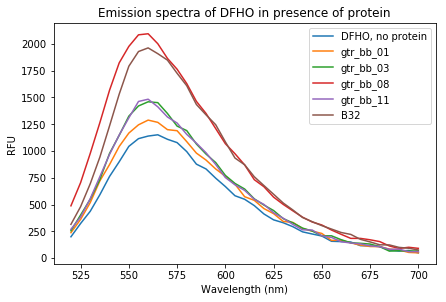

In [87]:
fluoresence = pd.read_csv("03-04-data.csv", header=0, sep=',')
fig, ax1 = plt.subplots()
ax1.plot(fluoresence['Wavelength'],fluoresence['control'], '-',label="DFHO, no protein")
ax1.plot(fluoresence['Wavelength'],fluoresence['gtr-bb-01'], '-',label="gtr_bb_01")
ax1.plot(fluoresence['Wavelength'],fluoresence['gtr-bb-03'], '-',label="gtr_bb_03")
ax1.plot(fluoresence['Wavelength'],fluoresence['gtr-bb-08'], '-',label="gtr_bb_08")
ax1.plot(fluoresence['Wavelength'],fluoresence['gtr-bb-11'], '-',label="gtr_bb_11")
ax1.plot(fluoresence['Wavelength'],fluoresence['b32'], '-', label="B32")
ax1.set(
    title='Emission spectra of DFHO in presence of protein',
    xlabel='Wavelength (nm)',
    ylabel='RFU')
ax1.legend()
plt.tight_layout(pad=0, h_pad=0, w_pad=0)
plt.savefig('quick_and_dirty_fluoresence.png', dpi=250, bbox_inches='tight')
plt.show()

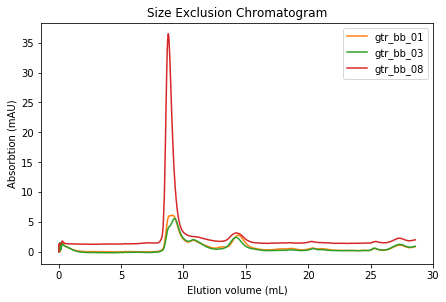

In [10]:
sec_01 = pd.read_csv("SEC_Superdex75_0.5mlfr_gtr_bb_01 001.csv",header=1,sep=',')
sec_08 = pd.read_csv("SEC_Superdex75_0.5mlfr_gtr_bb_08 001.csv",header=1,sep=',')
sec_03 = pd.read_csv("SEC_Superdex75_0.5mlfr_gtr_bb_03 001.csv",header=1,sep=',')
fig, ax1 = plt.subplots()
ax1.plot(sec_01['UV 1_280'],sec_01['abs 1'], '-',color='C1',label="gtr_bb_01")
ax1.plot(sec_03['UV 1_280'],sec_03['abs 1'],'-',color='C2',label="gtr_bb_03")
ax1.plot(sec_08['UV 1_280'],sec_08['abs 1'],'-',color='C3',label="gtr_bb_08")
ax1.set(
    title='Size Exclusion Chromatogram',
    xlabel='Elution volume (mL)',
    ylabel='Absorbtion (mAU)')
ax1.legend()
plt.tight_layout(pad=0, h_pad=0, w_pad=0)
plt.savefig('sec_elution.png', dpi=250, bbox_inches='tight')
plt.show()

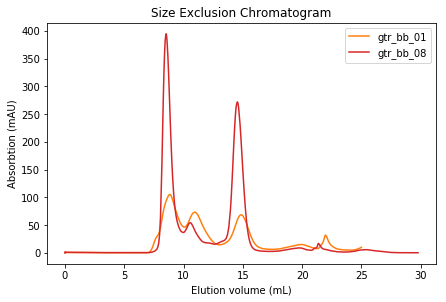

In [6]:
sec_01 = pd.read_csv("SEC_run_0.5mlfr_gtr_bb_01_large 001.csv",header=1,sep=',')
sec_08 = pd.read_csv("SEC_run_0.5mlfrgtr_bb_08_large 001.csv",header=1,sep=',')
fig, ax1 = plt.subplots()
ax1.plot(sec_01['UV 1_280'],sec_01['abs 1'], '-',color='C1',label="gtr_bb_01")
ax1.plot(sec_08['UV 1_280'],sec_08['abs 1'],'-',color='C3',label="gtr_bb_08")
ax1.set(
    title='Size Exclusion Chromatogram',
    xlabel='Elution volume (mL)',
    ylabel='Absorbtion (mAU)')
ax1.legend()
plt.tight_layout(pad=0, h_pad=0, w_pad=0)
plt.savefig('sec_elution_large_purification.png', dpi=250, bbox_inches='tight')
plt.show()

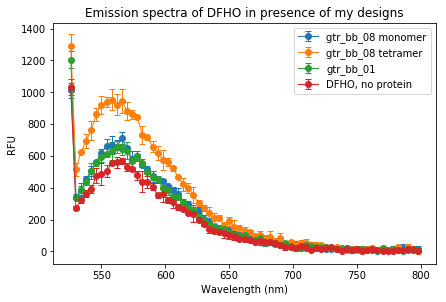

In [2]:
emission = pd.read_csv("binding/my-designs-same-conc-em-retry.csv", header=0, sep=',')
em_no_wl = emission[emission.columns[1:]]
em_no_wl_mean = em_no_wl.groupby(np.arange(len(em_no_wl.columns))//3, axis=1).mean()
em_no_wl_stddev = em_no_wl.groupby(np.arange(len(em_no_wl.columns))//3, axis=1).std()
fig, ax1 = plt.subplots()
plt.errorbar(emission['Wavelength'],em_no_wl_mean[0],yerr=em_no_wl_stddev[0],\
              lw=1, capsize=3, capthick=1, label='gtr_bb_08 monomer',marker='o')
plt.errorbar(emission['Wavelength'],em_no_wl_mean[1],yerr=em_no_wl_stddev[1],\
              lw=1, capsize=3, capthick=1, label='gtr_bb_08 tetramer',marker='o')
plt.errorbar(emission['Wavelength'],em_no_wl_mean[2],yerr=em_no_wl_stddev[2],\
              lw=1, capsize=3, capthick=1, label='gtr_bb_01',marker='o')
plt.errorbar(emission['Wavelength'],em_no_wl_mean[3],yerr=em_no_wl_stddev[3],\
              lw=1, capsize=3, capthick=1, label='DFHO, no protein',marker='o')
ax1.set(
    title="Emission spectra of DFHO in presence of my designs",
    xlabel='Wavelength (nm)',
    ylabel='RFU')
ax1.legend()
plt.tight_layout(pad=0, h_pad=0, w_pad=0)
plt.savefig('emission_spectra_my_designs_DFHO.png', dpi=250, bbox_inches='tight')
plt.show()

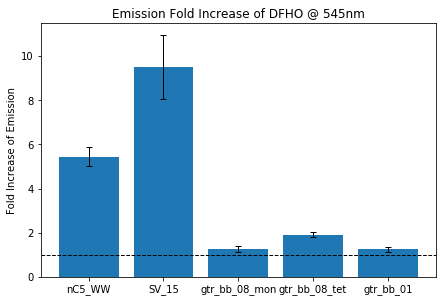

In [94]:
norm_505_545 = pd.read_csv("all_beta_barrels_read_505_545_fold_increase.csv", header=0, sep=',')
norm_505_545 = norm_505_545[norm_505_545.columns[1:]]
mean_norm_505_545 = norm_505_545.groupby(np.arange(len(norm_505_545.columns))//3, axis=1).mean()
std_norm_505_545 = norm_505_545.groupby(np.arange(len(norm_505_545.columns))//3, axis=1).std()
only_5_mean = (mean_norm_505_545[0][0],mean_norm_505_545[0][2],mean_norm_505_545[0][7],mean_norm_505_545[0][8],mean_norm_505_545[0][9])
only_5_std = (std_norm_505_545[0][0],std_norm_505_545[0][2],std_norm_505_545[0][7],std_norm_505_545[0][8],std_norm_505_545[0][9])
pos = np.arange(len(only_5_mean))
fig, ax1 = plt.subplots()
ax1.bar(pos,only_5_mean,align='center',yerr=only_5_std,\
       error_kw=dict(ecolor='black', lw=1, capsize=3, capthick=1))
plt.axhline(y=1.0, color='black', linestyle='--',lw=1)
ax1.set_xticks(pos)
ax1.set_xticklabels(('nC5_WW','SV_15','gtr_bb_08_mon','gtr_bb_08_tet','gtr_bb_01'))
ax1.set(
    title="Emission Fold Increase of DFHO @ 545nm",
    ylabel='Fold Increase of Emission')
ax1.legend()
plt.tight_layout(pad=0, h_pad=0, w_pad=0)
plt.savefig('fold_increase_at_545.png', dpi=250, bbox_inches='tight')
plt.show()

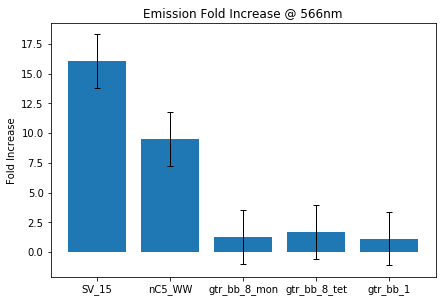

In [8]:
norm_505_545_names = pd.read_csv("binding/all_beta_barrels_em_566_extract_mean_stddev.csv", header=0, sep=',')
mean_norm_505_545 = norm_505_545_names['mean']
std_norm_505_545 = norm_505_545_names['stddev']
only_5_mean = (mean_norm_505_545[0],mean_norm_505_545[1],mean_norm_505_545[8],mean_norm_505_545[9],mean_norm_505_545[10])
only_5_std = (std_norm_505_545[0],std_norm_505_545[1],std_norm_505_545[8],std_norm_505_545[9],std_norm_505_545[10])
pos = np.arange(len(only_5_mean))
fig, ax1 = plt.subplots()
ax1.bar(pos,only_5_mean,align='center',yerr=only_5_std[0],\
       error_kw=dict(ecolor='black', lw=1, capsize=3, capthick=1))
ax1.set_xticks(pos)
ax1.set_xticklabels(('SV_15','nC5_WW','gtr_bb_8_mon','gtr_bb_8_tet','gtr_bb_1'))
ax1.set(
    title="Emission Fold Increase @ 566nm",
    ylabel='Fold Increase')
ax1.legend()
plt.tight_layout(pad=0, h_pad=0, w_pad=0)
#plt.savefig('fold_increase_at_545.png', dpi=250, bbox_inches='tight')
plt.show()